In [1]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA
from typing import List, Tuple
import scipy.cluster.hierarchy as shc
from scipy.spatial.distance import euclidean as dis
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
import time
from sklearn.metrics import silhouette_score

In [2]:
# Load your dataset (assuming the file is named 'your_dataset.csv')
file_path = 'ionosphere.csv'  # Replace 'path_to_your_file' with the actual path
data = pd.read_csv(file_path, header=None)

In [3]:
# Perform PCA for visualization
pca = PCA(n_components=2)
transformed_data = pca.fit_transform(data)

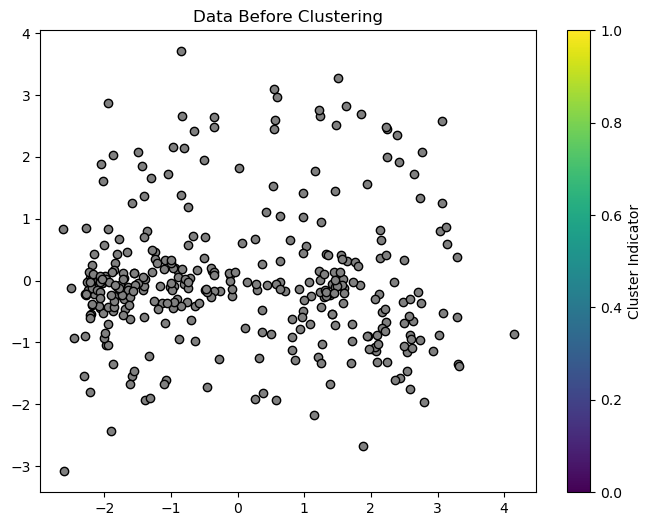

In [4]:
# Display the data before clustering
plt.figure(figsize=(8, 6))  # Same figure size as the first graph
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c='gray', marker='o', edgecolor='k')
plt.title('Data Before Clustering')
plt.colorbar(label='Cluster Indicator')  # Optional; can remove if you want no colorbar
plt.show()


In [5]:
# Function for K-means clustering
def kmeans(x, k, no_of_iterations):
    idx = np.random.choice(len(x), k, replace=False)
    centroids = x[idx, :]

    for _ in range(no_of_iterations):
        distances = cdist(x, centroids, 'euclidean')
        points = np.array([np.argmin(i) for i in distances])

        centroids = []
        for idx in range(k):
            temp_cent = x[points == idx].mean(axis=0)
            centroids.append(temp_cent)

        centroids = np.vstack(centroids)

    return points, centroids

In [6]:
# Apply K-means clustering
k = 2  # Number of clusters (you can change this)
no_of_iterations = 1000
labels, centroids = kmeans(transformed_data, k, no_of_iterations)

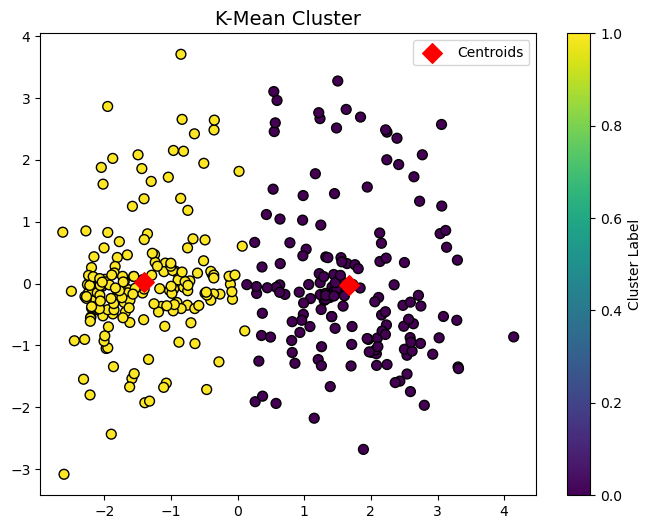

In [7]:
# Visualize the data with colors based on clusters and centroids as smaller diamonds
plt.figure(figsize=(8, 6))  # Set consistent figure size

# Plot data points colored by cluster labels
plt.scatter(
    transformed_data[:, 0],  # X-coordinates
    transformed_data[:, 1],  # Y-coordinates
    c=labels,  # Color points based on cluster labels
    cmap='viridis',  # Use a colormap for clusters
    marker='o',  # Circular markers for points
    edgecolor='k',  # Black edges around points
    s=50  # Size of the points
)

# Plot centroids as smaller diamond markers
plt.scatter(
    centroids[:, 0],  # X-coordinates of centroids
    centroids[:, 1],  # Y-coordinates of centroids
    color='red',  # Color of centroids
    marker='D',  # Diamond marker for centroids
    s=100,  # Reduced size for centroids
    label='Centroids'  # Legend label for centroids
)

# Add title, axis labels, and color bar
plt.title('K-Mean Cluster', fontsize=14)
plt.colorbar(label='Cluster Label')  # Add a color bar for cluster labels

# Add legend for centroids
plt.legend()

# Show the plot
plt.show()


In [8]:
# Assuming true labels are available in true_labels variable
true_labels = data.iloc[:, -1].values

In [9]:
# Function to calculate evaluation metrics
def calculate_metrics_alternative(true_labels, predicted_labels):
    purity = 0  # Purity calculation is different, needs to be computed separately
    accuracy = accuracy_score(true_labels, predicted_labels)
    precision = precision_score(true_labels, predicted_labels, average='weighted')
    recall = recall_score(true_labels, predicted_labels, average='weighted')
    f1 = f1_score(true_labels, predicted_labels, average='weighted')

    # Purity calculation
    confusion = confusion_matrix(true_labels, predicted_labels)
    purity = np.sum(np.amax(confusion, axis=0)) / np.sum(confusion)

    return purity, accuracy, precision, recall, f1

In [10]:
# Calculate evaluation metrics for K-means clustering
purity_kmeans, accuracy_kmeans, precision_kmeans, recall_kmeans, f1_score_kmeans = calculate_metrics_alternative(true_labels, labels)

In [11]:
# Print results for K-means clustering
print("Evaluation Metrics for K-means:")
print(f"Purity: {purity_kmeans}")
print(f"Accuracy: {accuracy_kmeans}")
print(f"Precision: {precision_kmeans}")
print(f"Recall: {recall_kmeans}")
print(f"F1-Score: {f1_score_kmeans}")
print()

Evaluation Metrics for K-means:
Purity: 0.7122507122507122
Accuracy: 0.28774928774928776
Precision: 0.33309192714227037
Recall: 0.28774928774928776
F1-Score: 0.3008292509833797



In [12]:
# Step 8: Inspecting the final clusters

# Add cluster assignments to the original DataFrame
data['Cluster'] = labels

# Display the first few rows with cluster assignments
print("Data with Cluster Assignments:")
print(data.head())

# Print KMeans centroids (cluster centers in PCA-transformed space)
print("\nCluster Centers (in PCA-transformed space):")
print(centroids)


Data with Cluster Assignments:
   0  1        2        3        4        5        6        7        8  \
0  1  0  0.99539 -0.05889  0.85243  0.02306  0.83398 -0.37708  1.00000   
1  1  0  1.00000 -0.18829  0.93035 -0.36156 -0.10868 -0.93597  1.00000   
2  1  0  1.00000 -0.03365  1.00000  0.00485  1.00000 -0.12062  0.88965   
3  1  0  1.00000 -0.45161  1.00000  1.00000  0.71216 -1.00000  0.00000   
4  1  0  1.00000 -0.02401  0.94140  0.06531  0.92106 -0.23255  0.77152   

         9  ...       26       27       28       29       30       31  \
0  0.03760  ...  0.41078 -0.46168  0.21266 -0.34090  0.42267 -0.54487   
1 -0.04549  ... -0.20468 -0.18401 -0.19040 -0.11593 -0.16626 -0.06288   
2  0.01198  ...  0.58984 -0.22145  0.43100 -0.17365  0.60436 -0.24180   
3  0.00000  ...  0.51613  1.00000  1.00000 -0.20099  0.25682  1.00000   
4 -0.16399  ...  0.13290 -0.53206  0.02431 -0.62197 -0.05707 -0.59573   

        32       33  34  Cluster  
0  0.18641 -0.45300   0        1  
1 -0.13738 -0.0

In [13]:
# Transform centroids back to the original feature space
original_space_centroids = pca.inverse_transform(centroids)

print("\nCluster Centers (in original feature space):")
print(original_space_centroids)



Cluster Centers (in original feature space):
[[ 8.49642478e-01  1.85477350e-16  4.65359946e-01  1.61013849e-01
   3.42640939e-01  2.40703691e-01  2.51126377e-01  3.51313437e-01
   1.63595482e-01  3.95867897e-01  5.64172711e-02  3.34972004e-01
  -8.88003724e-02  2.28088229e-01 -2.04790685e-01  1.84633006e-01
  -1.18801165e-01  1.10726270e-02 -1.39853782e-01 -2.83057956e-02
  -1.61817616e-01 -9.56531614e-02 -9.57747790e-02 -9.80601460e-02
   1.92585222e-02 -1.42078629e-01  2.74087949e-01 -1.74961526e-01
   3.67768375e-02 -6.45308661e-02  1.04619010e-02 -4.01240339e-02
   1.75697683e-02  4.09633247e-02  4.81405514e-01]
 [ 9.27408216e-01 -1.57167649e-16  7.90463362e-01 -5.44668408e-02
   8.20050730e-01  1.01249779e-02  8.03431702e-01 -7.71893337e-02
   8.06946355e-01 -4.34218375e-04  8.31878575e-01  2.57214434e-03
   8.15674105e-01 -2.07052888e-02  8.09321896e-01 -2.50445470e-02
   8.06268882e-01 -1.60641734e-02  7.82432678e-01 -2.03970363e-02
   7.59119717e-01  9.63790473e-02  7.50782313

In [14]:
# Print all rows in the dataset with cluster assignments
print("Complete Dataset with Cluster Assignments:")
print(data.to_string())


Complete Dataset with Cluster Assignments:
     0  1        2        3        4        5        6        7        8        9       10       11       12       13       14       15       16       17       18       19       20       21       22       23       24       25       26       27       28       29       30       31       32       33  34  Cluster
0    1  0  0.99539 -0.05889  0.85243  0.02306  0.83398 -0.37708  1.00000  0.03760  0.85243 -0.17755  0.59755 -0.44945  0.60536 -0.38223  0.84356 -0.38542  0.58212 -0.32192  0.56971 -0.29674  0.36946 -0.47357  0.56811 -0.51171  0.41078 -0.46168  0.21266 -0.34090  0.42267 -0.54487  0.18641 -0.45300   0        1
1    1  0  1.00000 -0.18829  0.93035 -0.36156 -0.10868 -0.93597  1.00000 -0.04549  0.50874 -0.67743  0.34432 -0.69707 -0.51685 -0.97515  0.05499 -0.62237  0.33109 -1.00000 -0.13151 -0.45300 -0.18056 -0.35734 -0.20332 -0.26569 -0.20468 -0.18401 -0.19040 -0.11593 -0.16626 -0.06288 -0.13738 -0.02447   1        0
2    1  0  1.00000 -0.03

In [15]:
# Function for K-medoids clustering
def k_medoids_clustering(
    data: np.ndarray, k: int, max_iter=100, random_seed=42
) -> Tuple[np.ndarray, np.ndarray, np.ndarray]:
    """
    k-medoid clustering with voronoi iteration
    """
    # Step 1: Initialization
    np.random.seed(random_seed)
    N = data.shape[0]
    medoids_idx = np.random.choice(N, k, replace=False)
    medoids = data[medoids_idx].copy()
    distances = np.zeros((N, k))
    medoid_history = [medoids.copy()]

    for i in range(k):
        distances[:, i] = np.sum(np.abs(data - medoids[i]), axis=1)

    # Assign each non-medoid data point to the closest medoid
    labels = np.argmin(distances, axis=1)
    old_labels = np.empty(N)
    all_idxs = np.arange(N)

    # Step 2: Update
    for it in range(max_iter):
        best_swap = (-1, -1, 0)
        best_distances = np.zeros(N)
        for i in range(k):
            # Compute the cost of swapping medoid and non-medoid data points
            non_medoids_idx = all_idxs[np.logical_not(np.isin(all_idxs, medoids_idx))]
            for j in non_medoids_idx:
                new_medoid = data[j]
                new_distances = np.sum(np.abs(data - new_medoid), axis=1)
                cost_change = np.sum(new_distances[labels == i]) - np.sum(
                    distances[labels == i, i]
                )
                if cost_change < best_swap[2]:
                    best_swap = (i, j, cost_change)
                    best_distances = new_distances
        if best_swap == (-1, -1, 0):
            break
            
        i, j, _ = best_swap
        distances[:, i] = best_distances
        medoids[i] = data[j]

        labels = np.argmin(distances, axis=1)
        medoid_history.append(medoids.copy())

        old_labels = labels
    print(f"* converged after {it + 1} iterations")
    medoid_history = np.array(medoid_history)

    return labels, medoids, medoid_history

In [16]:
# Apply K-medoids clustering
k_medoids_labels, k_medoids_centroids, _ = k_medoids_clustering(transformed_data, k=2, max_iter=1000)


* converged after 2 iterations


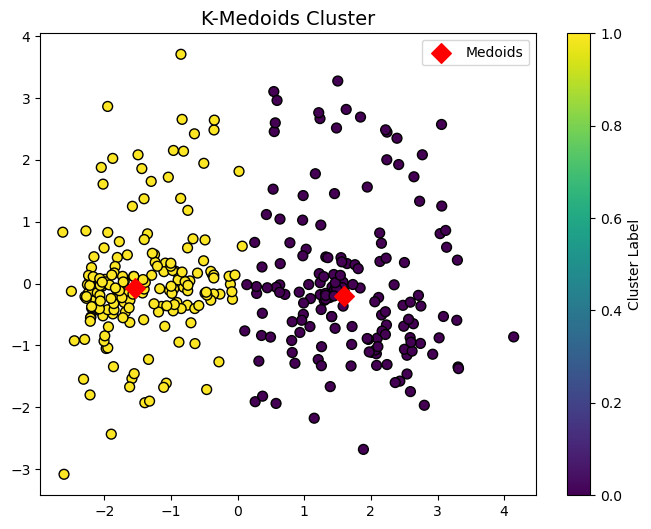

In [17]:
# Visualize K-medoids clustering 
plt.figure(figsize=(8, 6))  # Set consistent figure size

# Plot data points colored by cluster labels
plt.scatter(
    transformed_data[:, 0],  # X-coordinates
    transformed_data[:, 1],  # Y-coordinates
    c=k_medoids_labels,  # Color points based on cluster labels
    cmap='viridis',  # Use the same colormap as K-means
    marker='o',  # Circular markers for points
    edgecolor='k',  # Black edges around points
    s=50  # Size of the points
)

# Plot medoids as diamond markers
plt.scatter(
    k_medoids_centroids[:, 0],  # X-coordinates of medoids
    k_medoids_centroids[:, 1],  # Y-coordinates of medoids
    color='red',  # Color of medoids (same as centroids in K-means)
    marker='D',  # Diamond marker for medoids
    s=100,  # Size of medoids
    label='Medoids'  # Legend label for medoids
)

# Add title, color bar, and legend
plt.title('K-Medoids Cluster', fontsize=14)
plt.colorbar(label='Cluster Label')  # Add a color bar for cluster labels
plt.legend()  # Show legend

# Show the plot
plt.show()

In [18]:
# Assuming true labels are available in true_labels variable
true_labels = data.iloc[:, -1].values

# Function to calculate evaluation metrics
def calculate_metrics_alternative(true_labels, predicted_labels):
    purity = 0  # Purity calculation is different, needs to be computed separately
    accuracy = accuracy_score(true_labels, predicted_labels)
    precision = precision_score(true_labels, predicted_labels, average='weighted')
    recall = recall_score(true_labels, predicted_labels, average='weighted')
    f1 = f1_score(true_labels, predicted_labels, average='weighted')

    # Purity calculation
    confusion = confusion_matrix(true_labels, predicted_labels)
    purity = np.sum(np.amax(confusion, axis=0)) / np.sum(confusion)

    return purity, accuracy, precision, recall, f1

In [19]:
# Calculate evaluation metrics for K-medoids clustering
purity_kmedoids, accuracy_kmedoids, precision_kmedoids, recall_kmedoids, f1_score_kmedoids = calculate_metrics_alternative(true_labels, k_medoids_labels)

In [20]:
# Print results for K-medoids clustering
print("Evaluation Metrics for K-medoids:")
print(f"Purity: {purity_kmedoids}")
print(f"Accuracy: {accuracy_kmedoids}")
print(f"Precision: {precision_kmedoids}")
print(f"Recall: {recall_kmedoids}")
print(f"F1-Score: {f1_score_kmedoids}")
print()

Evaluation Metrics for K-medoids:
Purity: 0.9971509971509972
Accuracy: 0.9971509971509972
Precision: 0.9971685835883367
Recall: 0.9971509971509972
F1-Score: 0.9971516487931692



In [21]:
# Step 8: Inspecting the final clusters

# Add cluster assignments to the original DataFrame
data['Cluster'] = k_medoids_labels

# Display the first few rows with cluster assignments
print("Data with Cluster Assignments:")
print(data.head())

# Print KMeans centroids (cluster centers in PCA-transformed space)
print("\nCluster Centers (in PCA-transformed space):")
print(k_medoids_centroids)

Data with Cluster Assignments:
   0  1        2        3        4        5        6        7        8  \
0  1  0  0.99539 -0.05889  0.85243  0.02306  0.83398 -0.37708  1.00000   
1  1  0  1.00000 -0.18829  0.93035 -0.36156 -0.10868 -0.93597  1.00000   
2  1  0  1.00000 -0.03365  1.00000  0.00485  1.00000 -0.12062  0.88965   
3  1  0  1.00000 -0.45161  1.00000  1.00000  0.71216 -1.00000  0.00000   
4  1  0  1.00000 -0.02401  0.94140  0.06531  0.92106 -0.23255  0.77152   

         9  ...       26       27       28       29       30       31  \
0  0.03760  ...  0.41078 -0.46168  0.21266 -0.34090  0.42267 -0.54487   
1 -0.04549  ... -0.20468 -0.18401 -0.19040 -0.11593 -0.16626 -0.06288   
2  0.01198  ...  0.58984 -0.22145  0.43100 -0.17365  0.60436 -0.24180   
3  0.00000  ...  0.51613  1.00000  1.00000 -0.20099  0.25682  1.00000   
4 -0.16399  ...  0.13290 -0.53206  0.02431 -0.62197 -0.05707 -0.59573   

        32       33  34  Cluster  
0  0.18641 -0.45300   0        1  
1 -0.13738 -0.0

In [22]:
# Print all rows in the dataset with cluster assignments
print("Complete Dataset with Cluster Assignments:")
print(data.to_string())


Complete Dataset with Cluster Assignments:
     0  1        2        3        4        5        6        7        8        9       10       11       12       13       14       15       16       17       18       19       20       21       22       23       24       25       26       27       28       29       30       31       32       33  34  Cluster
0    1  0  0.99539 -0.05889  0.85243  0.02306  0.83398 -0.37708  1.00000  0.03760  0.85243 -0.17755  0.59755 -0.44945  0.60536 -0.38223  0.84356 -0.38542  0.58212 -0.32192  0.56971 -0.29674  0.36946 -0.47357  0.56811 -0.51171  0.41078 -0.46168  0.21266 -0.34090  0.42267 -0.54487  0.18641 -0.45300   0        1
1    1  0  1.00000 -0.18829  0.93035 -0.36156 -0.10868 -0.93597  1.00000 -0.04549  0.50874 -0.67743  0.34432 -0.69707 -0.51685 -0.97515  0.05499 -0.62237  0.33109 -1.00000 -0.13151 -0.45300 -0.18056 -0.35734 -0.20332 -0.26569 -0.20468 -0.18401 -0.19040 -0.11593 -0.16626 -0.06288 -0.13738 -0.02447   1        0
2    1  0  1.00000 -0.03

In [23]:
# Transform centroids back to the original feature space
original_space_kcentroids = pca.inverse_transform(k_medoids_centroids)

print("\nCluster Centers (in original feature space):")
print(original_space_kcentroids)


Cluster Centers (in original feature space):
[[ 8.49301032e-01  1.80625264e-16  4.56749585e-01  1.47433816e-01
   3.36866681e-01  2.37819493e-01  2.46806038e-01  3.29428039e-01
   1.61204018e-01  3.74566057e-01  5.36855264e-02  3.04450127e-01
  -9.07430245e-02  1.89129327e-01 -2.03512438e-01  1.43715474e-01
  -1.04963809e-01 -3.74627676e-02 -1.23519244e-01 -9.27216045e-02
  -1.33085987e-01 -1.51719582e-01 -6.98333366e-02 -1.51022652e-01
   5.55092293e-02 -1.91050133e-01  3.05005058e-01 -2.28501865e-01
   7.72437336e-02 -1.08436224e-01  5.53829841e-02 -6.92952203e-02
   5.57013410e-02  1.41565622e-02  4.85507670e-01]
 [ 9.29484534e-01 -1.69727026e-16  7.95289192e-01 -6.80147367e-02
   8.30823759e-01  1.87771773e-03  8.17161034e-01 -1.01383334e-01
   8.24356098e-01 -2.33794742e-02  8.52944282e-01 -2.34638025e-02
   8.40911798e-01 -4.88392526e-02  8.39473510e-01 -5.30929592e-02
   8.40572446e-01 -4.28964400e-02  8.17995335e-01 -5.47323618e-02
   8.01295376e-01  7.18737809e-02  7.89299608

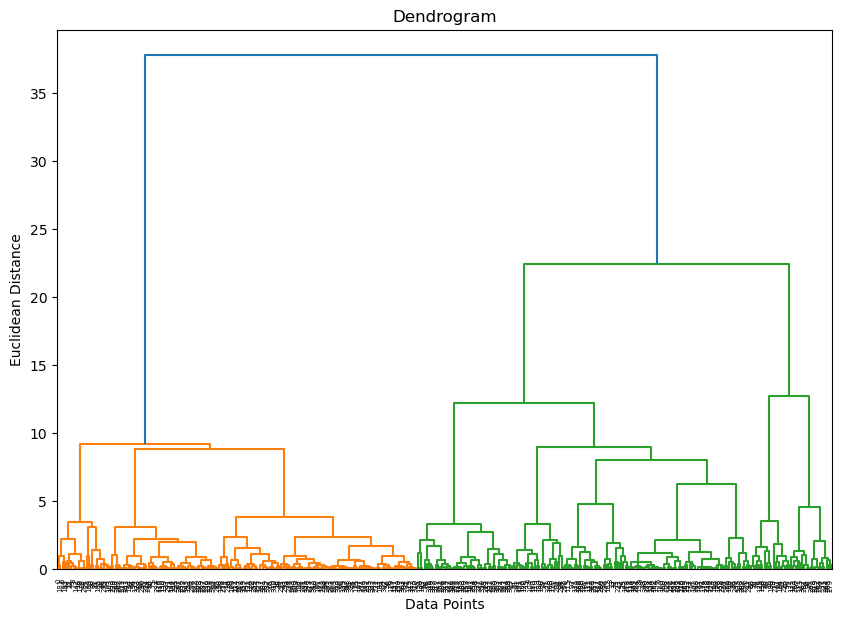

In [24]:
# Step 5: Plot the dendrogram for visualization
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
linkage_matrix = shc.linkage(transformed_data, method='ward')  # Ward linkage for hierarchical clustering
dendrogram = shc.dendrogram(linkage_matrix)
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

In [25]:
# Define rounded labels based on the transformed data or any appropriate data array
rounded_labels = [f"{x:.2f}" for x in range(len(transformed_data))]

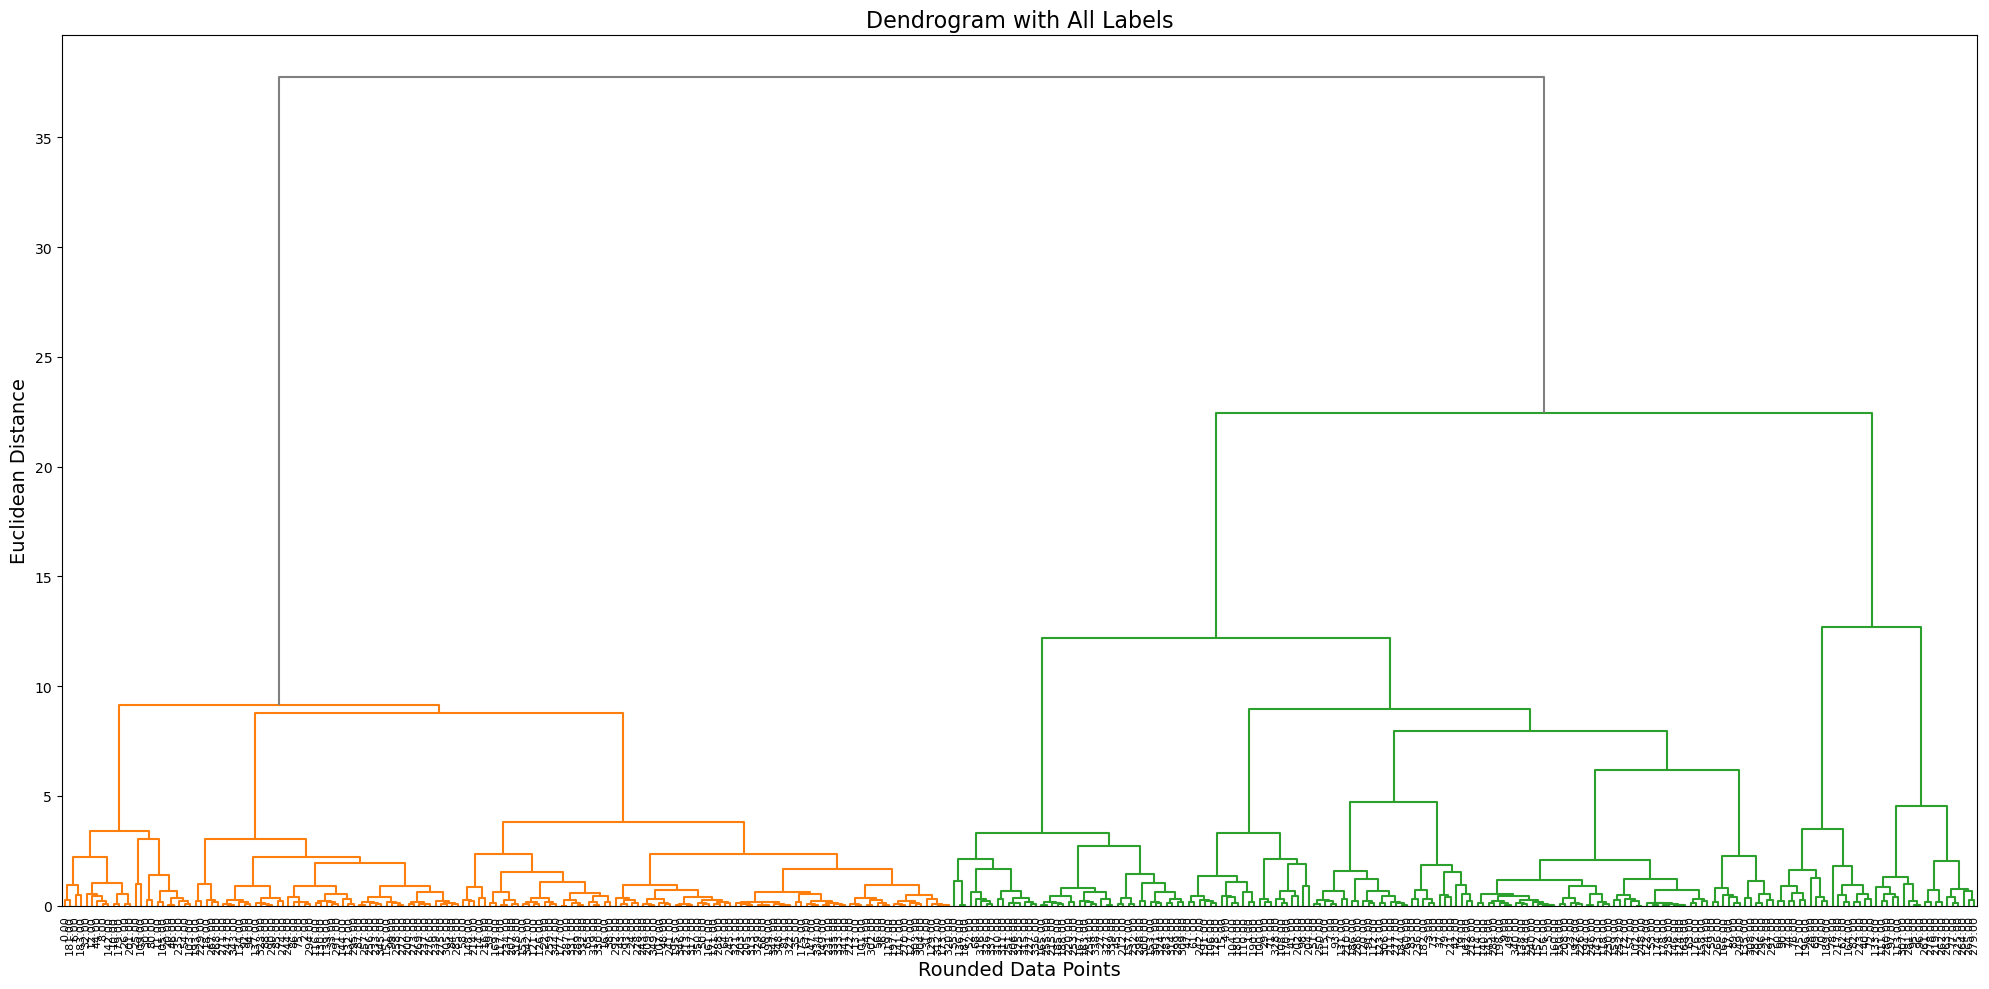

In [26]:
plt.figure(figsize=(20, 10))  # Increase the figure size significantly
dendrogram = shc.dendrogram(
    linkage_matrix,
    labels=rounded_labels,
    leaf_rotation=90,
    leaf_font_size=8,
    above_threshold_color='grey'
)

plt.title("Dendrogram with All Labels", fontsize=16)
plt.xlabel("Rounded Data Points", fontsize=14)
plt.ylabel("Euclidean Distance", fontsize=14)
plt.tight_layout()
plt.show()



In [27]:
# Step 6: Perform Agglomerative Clustering
num_clusters = 2  # Number of clusters 
agglomerative = AgglomerativeClustering(n_clusters=num_clusters, linkage='ward')
labels = agglomerative.fit_predict(transformed_data)

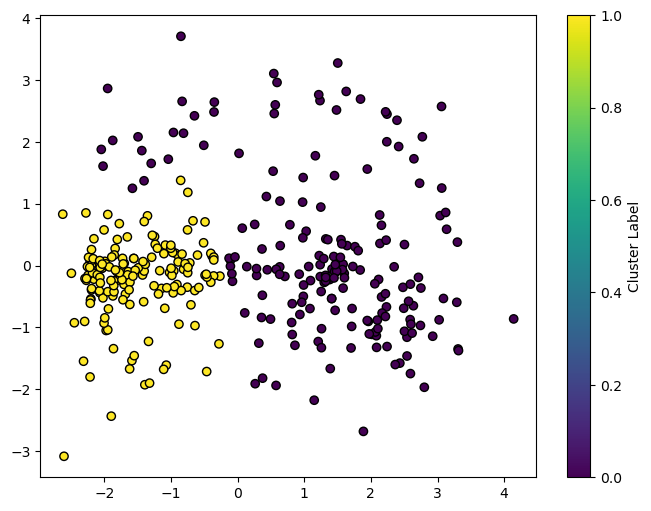

Cluster Labels for Each Data Point:
[1 0 1 0 0 0 1 0 1 0 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1
 0 1 1 0 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0
 0 1 0 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 1 0 1 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0
 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 1 1 0 1 0 1 0 0 1 0 1 0 1 1 0 1 0 0 1
 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0
 1 0 0 0 0 0 1 1 0 1 0 1 1 1 0 1 0 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 1 1 1
 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1
 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1
 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]


In [28]:
# Step 7: Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(
    transformed_data[:, 0],  # X-coordinates
    transformed_data[:, 1],  # Y-coordinates
    c=labels,  # Color points based on cluster labels
    cmap='viridis',  # Colormap for clusters
    marker='o',  # Marker style
    edgecolor='k'  # Black edges around points
)

plt.colorbar(label="Cluster Label")
plt.show()

# Step 8: Print Cluster Labels
print("Cluster Labels for Each Data Point:")
print(labels)

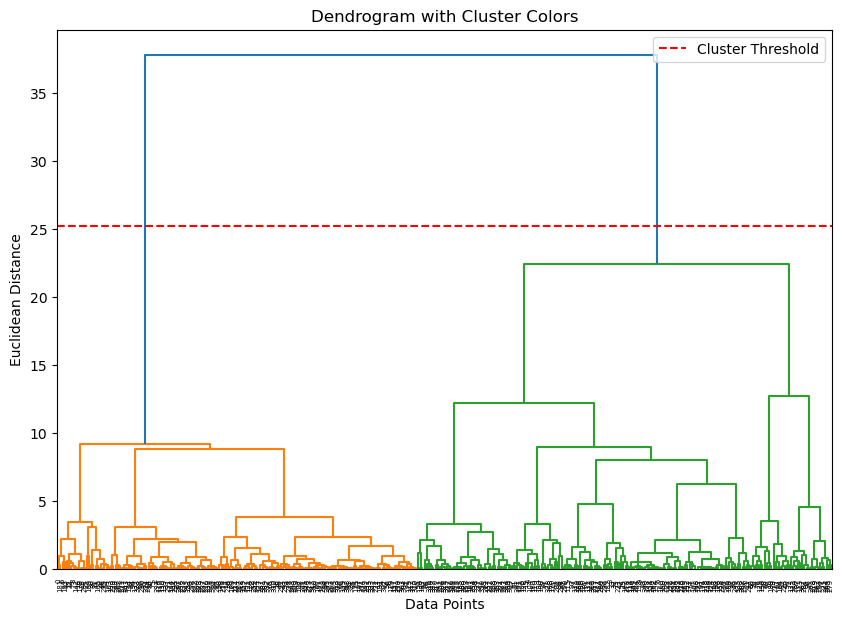

Cluster Labels for Each Data Point:
[1 0 1 0 0 0 1 0 1 0 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1
 0 1 1 0 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0
 0 1 0 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 1 0 1 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0
 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 1 1 0 1 0 1 0 0 1 0 1 0 1 1 0 1 0 0 1
 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0
 1 0 0 0 0 0 1 1 0 1 0 1 1 1 0 1 0 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 1 1 1
 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1
 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1
 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]


In [29]:
# Step 7: Plot the dendrogram showing hierarchical clustering
plt.figure(figsize=(10, 7))
plt.title("Dendrogram with Cluster Colors")
linkage_matrix = shc.linkage(transformed_data, method='ward')  # Ward linkage for hierarchical clustering

# Calculate the color threshold to visualize distinct clusters in the dendrogram
distance_threshold = np.max(linkage_matrix[:, 2]) / 1.5  # Midpoint of the largest distance for 3 clusters
shc.dendrogram(
    linkage_matrix,
    color_threshold=distance_threshold,  # Set the threshold for coloring clusters
    truncate_mode=None,  # Show the full dendrogram
)
plt.axhline(y=distance_threshold, color='red', linestyle='--', label='Cluster Threshold')  # Horizontal threshold line
plt.legend()
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

# Step 8: Print Cluster Labels
print("Cluster Labels for Each Data Point:")
print(labels)

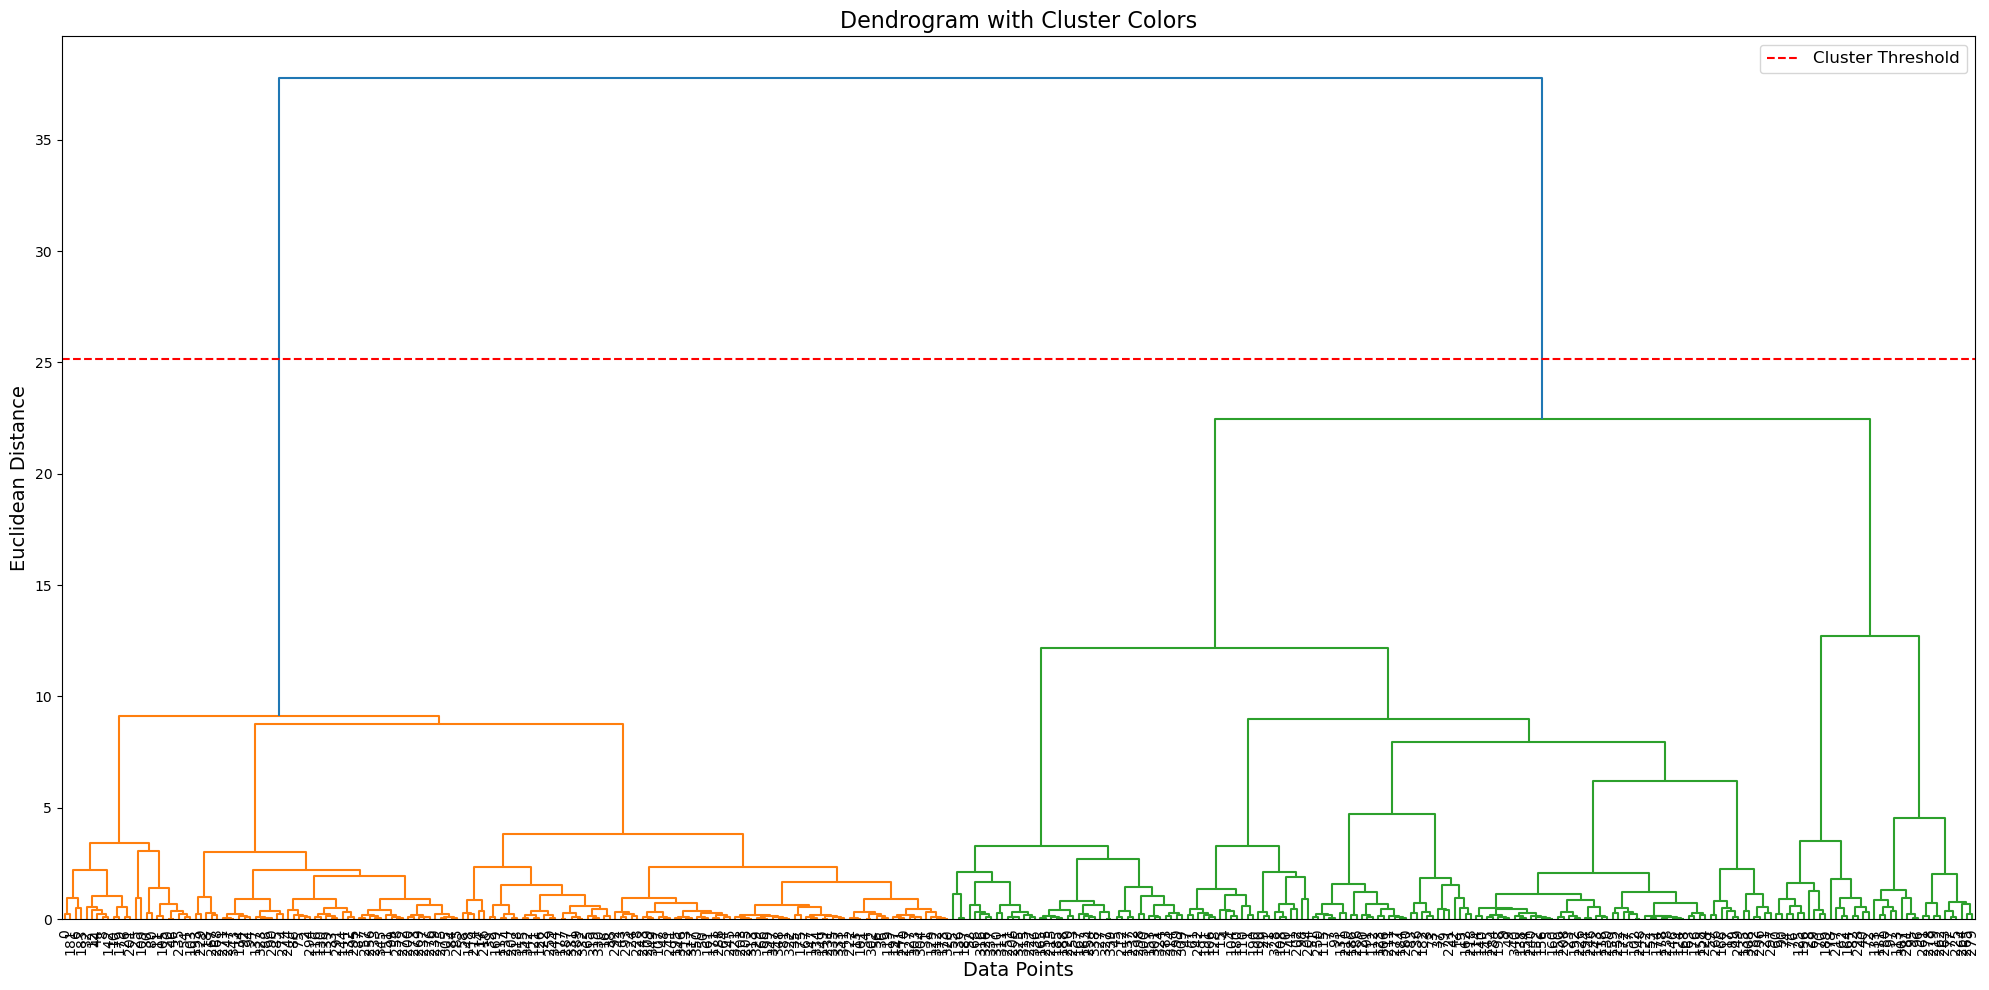

Cluster Labels for Each Data Point:
[1 0 1 0 0 0 1 0 1 0 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1
 0 1 1 0 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0
 0 1 0 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 1 0 1 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0
 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 1 1 0 1 0 1 0 0 1 0 1 0 1 1 0 1 0 0 1
 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0
 1 0 0 0 0 0 1 1 0 1 0 1 1 1 0 1 0 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 1 1 1
 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1
 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1
 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]


In [30]:
# Step 7: Plot the dendrogram showing hierarchical clustering
plt.figure(figsize=(20, 10))  # Increase the figure size for better readability
plt.title("Dendrogram with Cluster Colors", fontsize=16)

# Perform hierarchical clustering
linkage_matrix = shc.linkage(transformed_data, method='ward')  # Ward linkage for hierarchical clustering

# Calculate the color threshold to visualize distinct clusters in the dendrogram
distance_threshold = np.max(linkage_matrix[:, 2]) / 1.5  # Midpoint of the largest distance for 3 clusters

# Plot the dendrogram with cluster coloring
shc.dendrogram(
    linkage_matrix,
    color_threshold=distance_threshold,  # Set the threshold for coloring clusters
    truncate_mode=None,  # Show the full dendrogram
    leaf_rotation=90,  # Rotate x-axis labels for better readability
    leaf_font_size=10  # Adjust font size for labels
)

# Add a horizontal threshold line
plt.axhline(y=distance_threshold, color='red', linestyle='--', label='Cluster Threshold')

# Add legend and labels
plt.legend(fontsize=12)
plt.xlabel("Data Points", fontsize=14)
plt.ylabel("Euclidean Distance", fontsize=14)
plt.tight_layout()  # Adjust layout to prevent label overlap
plt.show()

# Step 8: Print Cluster Labels
print("Cluster Labels for Each Data Point:")
print(labels)


In [31]:

# Step 8: Evaluation Metrics for Agglomerative Clustering

# Assuming true labels are available in `true_labels` variable
true_labels = data.iloc[:, -1].values  # Replace with the correct column containing true labels

# Function to calculate evaluation metrics
def calculate_metrics_alternative(true_labels, predicted_labels):
    # Calculate accuracy, precision, recall, and F1-score
    accuracy = accuracy_score(true_labels, predicted_labels)
    precision = precision_score(true_labels, predicted_labels, average='weighted')
    recall = recall_score(true_labels, predicted_labels, average='weighted')
    f1 = f1_score(true_labels, predicted_labels, average='weighted')

    # Calculate purity
    confusion = confusion_matrix(true_labels, predicted_labels)
    purity = np.sum(np.amax(confusion, axis=0)) / np.sum(confusion)

    return purity, accuracy, precision, recall, f1    

# Calculate evaluation metrics for Agglomerative Clustering
purity_agg, accuracy_agg, precision_agg, recall_agg, f1_score_agg = calculate_metrics_alternative(true_labels, labels)

# Print results for Agglomerative Clustering
print("Evaluation Metrics for Agglomerative Clustering:")
print(f"Purity: {purity_agg}")
print(f"Accuracy: {accuracy_agg}")
print(f"Precision: {precision_agg}")
print(f"Recall: {recall_agg}")
print(f"F1-Score: {f1_score_agg}")
print()


Evaluation Metrics for Agglomerative Clustering:
Purity: 0.9259259259259259
Accuracy: 0.9259259259259259
Precision: 0.9361702127659575
Recall: 0.9259259259259259
F1-Score: 0.9259415584415585



In [32]:

# Step 9: Inspecting the Final Clusters

# Add cluster assignments to the original DataFrame
data['Cluster'] = labels

# Display the first few rows with cluster assignments
print("Data with Cluster Assignments:")
print(data.head())

# Print all rows in the dataset with cluster assignments
print("Complete Dataset with Cluster Assignments:")
print(data.to_string())


Data with Cluster Assignments:
   0  1        2        3        4        5        6        7        8  \
0  1  0  0.99539 -0.05889  0.85243  0.02306  0.83398 -0.37708  1.00000   
1  1  0  1.00000 -0.18829  0.93035 -0.36156 -0.10868 -0.93597  1.00000   
2  1  0  1.00000 -0.03365  1.00000  0.00485  1.00000 -0.12062  0.88965   
3  1  0  1.00000 -0.45161  1.00000  1.00000  0.71216 -1.00000  0.00000   
4  1  0  1.00000 -0.02401  0.94140  0.06531  0.92106 -0.23255  0.77152   

         9  ...       26       27       28       29       30       31  \
0  0.03760  ...  0.41078 -0.46168  0.21266 -0.34090  0.42267 -0.54487   
1 -0.04549  ... -0.20468 -0.18401 -0.19040 -0.11593 -0.16626 -0.06288   
2  0.01198  ...  0.58984 -0.22145  0.43100 -0.17365  0.60436 -0.24180   
3  0.00000  ...  0.51613  1.00000  1.00000 -0.20099  0.25682  1.00000   
4 -0.16399  ...  0.13290 -0.53206  0.02431 -0.62197 -0.05707 -0.59573   

        32       33  34  Cluster  
0  0.18641 -0.45300   0        1  
1 -0.13738 -0.0

In [33]:
# Timing K-means clustering
start_time_kmeans = time.time()
labels_kmeans, centroids_kmeans = kmeans(transformed_data, k=2, no_of_iterations=1000)
end_time_kmeans = time.time()
time_kmeans = end_time_kmeans - start_time_kmeans

# Timing K-medoids clustering
start_time_kmedoids = time.time()
labels_kmedoids, centroids_kmedoids, _ = k_medoids_clustering(transformed_data, k=2, max_iter=1000)
end_time_kmedoids = time.time()
time_kmedoids = end_time_kmedoids - start_time_kmedoids

# Timing Agglomerative Clustering
start_time_agg = time.time()
agglomerative = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels_agg = agglomerative.fit_predict(transformed_data)
end_time_agg = time.time()
time_agg = end_time_agg - start_time_agg

# Compile and display the timing results
timing_results = {
    "Clustering Method": ["K-means", "K-medoids", "Agglomerative"],
    "Time Taken (seconds)": [time_kmeans, time_kmedoids, time_agg]
}

timing_df = pd.DataFrame(timing_results)


print("Clustering Timing Results:")
print(timing_df)


* converged after 2 iterations
Clustering Timing Results:
  Clustering Method  Time Taken (seconds)
0           K-means              0.284845
1         K-medoids              0.014432
2     Agglomerative              0.001406


In [34]:
def dunn_index(data, labels):
    """
    Compute the Dunn index for a clustering result.
    
    Parameters:
    - data: numpy array of shape (n_samples, n_features)
    - labels: array of cluster labels for each point
    
    Returns:
    - dunn: The Dunn index (higher is better)
    """
    unique_clusters = np.unique(labels)
    cluster_data = [data[labels == cluster] for cluster in unique_clusters]

    # Compute intra-cluster distances (largest distance within a cluster)
    intra_distances = [np.max(cdist(cluster, cluster)) for cluster in cluster_data]

    # Compute inter-cluster distances (smallest distance between clusters)
    inter_distances = [
        np.min(cdist(cluster_data[i], cluster_data[j]))
        for i in range(len(cluster_data)) for j in range(i + 1, len(cluster_data))
    ]

    # Dunn index is the ratio of the smallest inter-cluster distance
    # to the largest intra-cluster distance
    dunn = np.min(inter_distances) / np.max(intra_distances)
    return dunn

In [35]:
sil_score = silhouette_score(data, labels)

In [36]:
print("K-means Metrics")
print(f"Silhouette Score: {silhouette_score(data, labels_kmeans)}")
print(f"Dunn Index: {dunn_index(data, labels_kmeans)}\n")

print("K-medoids Metrics")
print(f"Silhouette Score: {silhouette_score(data, labels_kmedoids)}")
print(f"Dunn Index: {dunn_index(data, labels_kmedoids)}\n")

print("Agglomerative Clustering Metrics")
print(f"Silhouette Score: {silhouette_score(data, labels_agg)}")
print(f"Dunn Index: {dunn_index(data, labels_agg)}")

K-means Metrics
Silhouette Score: 0.303547619064191
Dunn Index: 0.0713816546681141

K-medoids Metrics
Silhouette Score: 0.3028003870966605
Dunn Index: 0.0713816546681141

Agglomerative Clustering Metrics
Silhouette Score: 0.27033771825684827
Dunn Index: 0.05495624013225145
